# Fourier Transform on a Sine Wave with FPGA and Sw

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from pynq import Overlay
import axitimer
import axidma

max_fft_N = 12
ol = Overlay('FFTPynq.bit', ignore_version=True)

In [3]:
sw_fft_times = []
i = max_fft_N  # 12
swt = 0

size = 2 ** i  # 4096
din = np.empty(shape=(size,), dtype='complex64')

# Generate a sine wave
frequency = 5  # Example frequency of the sine wave
sampling_rate = size  # Assume the sampling rate is equal to the size
t = np.arange(size) / sampling_rate  # Time vector

# Fill the real part with a sine wave
din.real = np.sin(2 * np.pi * frequency * t)

# Optionally, set the imaginary part to zero if not needed
din.imag = 0.0

# Set a specific element, if required
din[20] = 1.0 + 0j  # Real = 1.0, Imaginary = 0.0

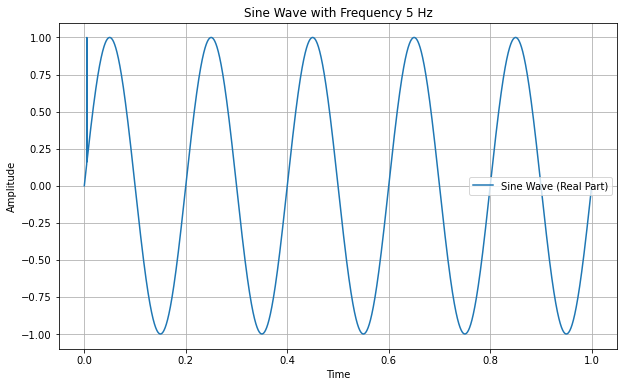

In [4]:
# Plotting the sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, din.real, label='Sine Wave (Real Part)')
plt.title(f'Sine Wave with Frequency {frequency} Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
fft = ol.axi_dma_0
fft.resize_bufs(shape=[size,], dtype='complex64')
for j in range(100):
    print(".",end="")
    fft.txbuf[0:size] = din
    fft.send_dma()
    fft.rcv_dma()
fft.rxbuf

....................................................................................................

PynqBuffer([0.8471985 +0.j        , 0.84680176-0.02604675j,
            0.8455963 -0.05195618j, ..., 0.8435974 +0.07783508j,
            0.8455963 +0.05194092j, 0.84680176+0.02598572j],
           dtype=complex64)

mean squared error: 1.1616956766895501e-10


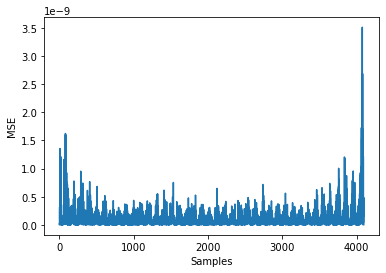

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
hw_fft_data = np.abs(np.array(fft.rxbuf))
sw_fft_data = np.abs(np.array(np.fft.fftn(din)))
err_squared = (hw_fft_data-sw_fft_data)**2
f, ax = plt.subplots()
ax.plot(err_squared)
ax.set_xlabel('Samples')
ax.set_ylabel('MSE');
print('mean squared error: ' + str(err_squared.mean()))

In [10]:
print(size)

4096


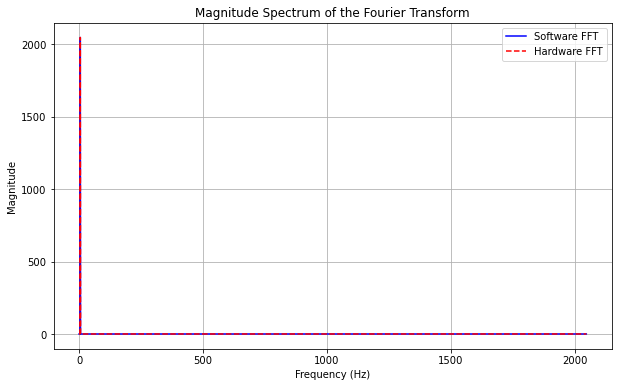

In [14]:
# Compute the Fourier Transforms (assuming these are already done)
# sw_fft_data = np.abs(np.array(np.fft.fftn(din)))
# hw_fft_data = np.abs(np.array(fft.rxbuf))

# Define the frequency axis
N = len(din)
sampling_rate = N  # Assuming sampling rate equals the number of samples (adjust as needed)
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

# Plot the magnitude spectrum of the software FFT
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N//2], sw_fft_data[:N//2], label='Software FFT', color='blue')

# Plot the magnitude spectrum of the hardware FFT (if needed)
plt.plot(frequencies[:N//2], hw_fft_data[:N//2], label='Hardware FFT', color='red', linestyle='dashed')

# Add labels and title
plt.title('Magnitude Spectrum of the Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

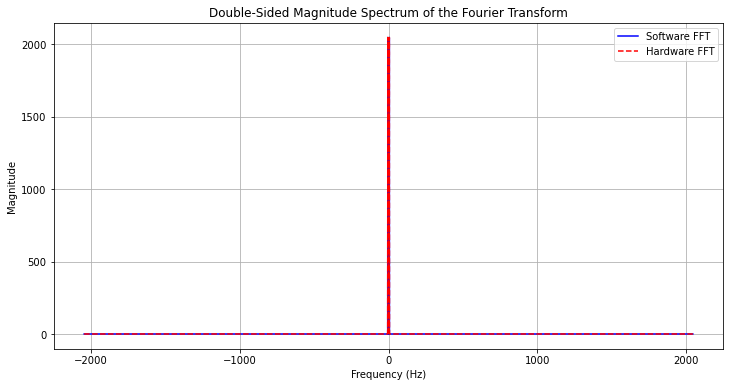

In [15]:
# Compute the Fourier Transforms (assuming these are already done)
# sw_fft_data = np.abs(np.array(np.fft.fftn(din)))
# hw_fft_data = np.abs(np.array(fft.rxbuf))

# Define the frequency axis for double-sided spectrum
N = len(din)
sampling_rate = N  # Adjust if needed
frequencies = np.fft.fftshift(np.fft.fftfreq(N, d=1/sampling_rate))

# Shift the FFT data to match the frequency axis
sw_fft_data_shifted = np.fft.fftshift(np.abs(np.fft.fftn(din)))
hw_fft_data_shifted = np.fft.fftshift(np.abs(np.array(fft.rxbuf)))

# Plot the double-sided spectrum of the software FFT
plt.figure(figsize=(12, 6))
plt.plot(frequencies, sw_fft_data_shifted, label='Software FFT', color='blue')

# Plot the double-sided spectrum of the hardware FFT (if needed)
plt.plot(frequencies, hw_fft_data_shifted, label='Hardware FFT', color='red', linestyle='dashed')

# Add labels and title
plt.title('Double-Sided Magnitude Spectrum of the Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()